# Modell 1

#### Konstantvalg
Vi begynner med å definere forskjellige startverdier, i tillegg til å lage verdier for tidssteg. Dermed definerer vi verdiene for naturlig fødselsrate, innvandringsrate og naturlig dødsrate. Vi har valgt 0.01 som fødselsrate på grunnlag av at vi fant ut at verdens gjennomsnittlige fødselsrate er 0.023. Vi tenkte dermed at fødselsraten kom til å være mye lavere under slike krisetider, og har dermed valgt å senke denne til under halvparten. Innvandringsraten har vi derimot fire ganger så stor, ettersom populasjonsvekst grunnet innvandring vil være mye mer sannsynlig da Alexandria er et "safespot" med foreløpig ubegrensede ressurser. Dødsraten er på verdensbasis 0.009, men vi har valgt å øke denne til 0.02 i vår modell ettersom tilgangen på medisiner, legebehandling og annet vil være svært begrenset i en slik situasjon. I tillegg vil sannsynligvis stress og andre liknende faktorer føre til lavere forventet levealder. 

#### Eulers metode
Dermed lager vi og initierer de matrisene vi trenger, og setter disse inn i Eulers metode. Vi definerer endringen i mennesker som fødselsraten pluss innvandringsraten minus dødsraten multiplisert med antallet mennesker ved forrige tidssteg. Vi adderer dermed endringen i mennesker multiplisert med tidssteget med antallet mennesker ved forrige tidssteg, for å få det nye folketallet. Vi oppdaterer dermed tidsverdien med tidssteget. Vi legger alle disse verdiene inn i matriser, som vi deretter plotter mot hverandre, tid på førsteaksen, og mennesker på andreaksen. 

#### Tolkning av grafen
Av denne grafen ser vi at veksten av mennesker i Alexandria er eksponentiell, og at folketallet dermed når 10 000 etter 100 år.

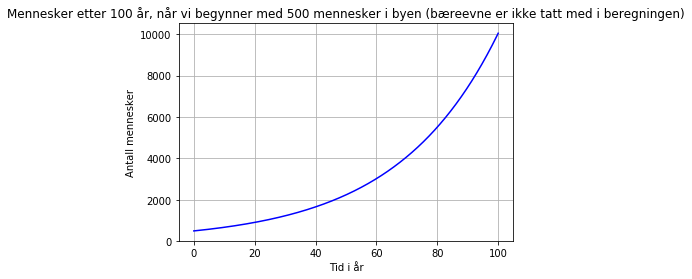

In [80]:
from pylab import *

#Initialbetingelser
M0 = 500                    #Mennesker i Alexandia ved start
t0 = 0                      #Startid

#Tidssteg
N       = 100000
t_slutt = 100               #Tid i år
dt      = (t_slutt-t0)/N

#Konstanter
f   = 0.01                  #Naturlig fødselsrate
inn = 0.04                  #Innvandringsrate
d   = 0.02                  #Naturlig dødsrate

#Matriser
t    = zeros(N)
M    = zeros(N)
Mder = zeros(N)

#Initiering av matriser
t[0] = t0
M[0] = M0

#Eulers metode
for i in range (N-1):
    Mder[i] = f*M[i] + inn*M[i] - d*M[i]
    M[i+1] = M[i]+ Mder[i]*dt
    t[i+1] = t[i] + dt
    
plot(t,M, color = 'blue')
title('Mennesker etter 100 år, når vi begynner med 500 mennesker i byen (bæreevne er ikke tatt med i beregningen)')
xlabel('Tid i år')
ylabel('Antall mennesker')
grid()

# Modell 2

#### Bæreevne
I denne modellen har vi lagt inn en bæreevne for byen Alexandria. Grunnen til at vi får en bæreevne er at ressursene vil være veldig begrenset under en zombieapokalypse. Både mattilgang, tilførsel på rent vann (grunnet mulig zombiesmitte i vannet) og arealbegrensning vil være faktorer som spiller inn på en slik bæreevne. Vi har valgt å sette denne verdien til 1000. Dette har vi kommet frem til etter å ha sett på kartet over Alexandria og vurdert hvor mange mennesker området kan romme.

#### Endringen av programmet
For å få lagt til bæreevnen definerer vi først konstanten for bæreevne som b. Denne legger vi inn i Eulers metode ved å multiplisere utrykket for den deriverte av antall mennesker i forrige oppgave med et utrykk for bæreevne. Dette uttrykket definerer vi som (1-M[i]/b). Da ser vi at jo nærmere antall mennesker kommer 1000, så vil dette utrykket bli nærmere og nærmere 0. Stigningstallet blir som følger av dette mindre jo nærmere vi kommer bæreevnen, og det vil bli 0 når vi har nådd bæreevnen.

#### Tolkning av grafen
Her ser vi en logistisk vekst, der menneskene i Alexandria når en bæreevne etter omtrent 150 år. Dette er sannsynlig ettersom at vi har en relativt lav fødselsrate.

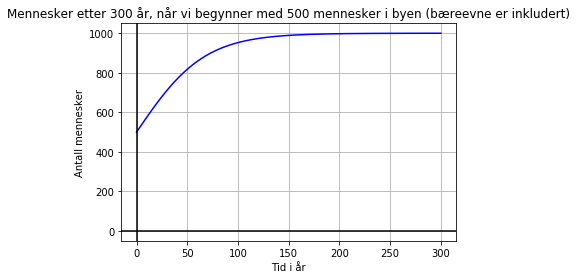

In [87]:
#Initialbetingelser
M0 = 500          #Mennesker i Alexandia ved start
t0 = 0            #Startid

#Tidssteg
N       = 10000
t_slutt = 300     #Tid i år
dt      = (t0 + t_slutt)/N

#Konstanter
f   = 0.01        #Naturligfødselsrate
d   = 0.02        #Naturligdødsrate
inn = 0.04        #Invandringsrate
b   = 1000        #Bæreevne

#Matriser
t    = zeros(N)
M    = zeros(N)
Mder = zeros(N)

#Initiering av matriser
t[0] = t0
M[0] = M0

#Eulers metode
for i in range (N-1):
    Mder[i] = (f*M[i] + inn*M[i] - d*M[i])*(1-M[i]/b)
    M[i+1] = M[i]+ Mder[i]*dt
    t[i+1] = t[i] + dt
    
plot(t,M, color = 'blue')
title('Mennesker etter 300 år, når vi begynner med 500 mennesker i byen (bæreevne er inkludert)')
axvline(color = 'black')
axhline(color = 'black')
xlabel('Tid i år')
ylabel('Antall mennesker')
grid()

# Modell 3

#### Død ved alderdom, sykdom og skader
I denne modellen legger vi inn forskjellige dødsårsaker med forskjellige dødsrater. Disse vil være alderdom, sykdom og skade. Vi har valgt verdien 0.002 som dødsrate grunnet alderdom, da vi regner med at svært få vil overleve lenge nok til å faktisk dø av alderdom. Død grunnet sykdom og skader, vil derimot skje vesentlig hyppigere. Dette har vi kommet frem til fordi vi regner med at medisinressurser og legetilgang ikke vil være tilgjengelig, og at en liten forkjølelse eller et lite papirkutt fort kan få fatale konsekvenser uten riktig behandling. Vi har valgt å sette sykdomsdødsraten høyere en dødsraten grunnet skade, fordi sykdom ofte går ut over flere mennesker på en gang på grunn av mulighet for smitte, mens kutt og liknende ikke er smittsomt.

#### Endringer i programmet
Vi har nå definert 3 konstanter istedenfor den ene naturlige dødsraten vi hadde i de to tidligere modellene. Dermed har vi lagt inn disse i Eulers metode ved å addere dem med hverandre og videre regne med den totale dødsraten på samme måte som i forrige modell.

#### Tolkning av grafen
Veksten blir ikke like intens i denne modellen som i forrige modell. Dette er grunnet at dødsraten totalt er høyere enn i forrige modell.

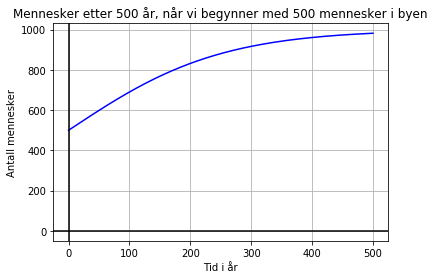

In [82]:
#Initialbetingelser
M0 = 500         #Mennesker i Alexandia ved start
t0 = 0           #Startid

#Tidssteg
N       = 10000
t_slutt = 500    #Tid i år
dt      = (t0 + t_slutt)/N

#Konstanter
f       = 0.01   #Naturligfødselsrate
inn     = 0.04   #Invandringsrate
d_alder = 0.002  #Dødsrate grunnet alderdom
d_syk   = 0.03   #Dødsrate grunnet sykdom
d_skade = 0.01   #Dødsrate grunnet skader
b       = 1000   #Bæreevne

#Matriser
t = zeros(N)
M = zeros(N)
Mder = zeros(N)

#Initiering av matriser
t[0] = t0
M[0] = M0

#Eulers metode
for i in range (N-1):
    Mder[i] = (f*M[i] + inn*M[i] -(d_alder*M[i] + d_syk*M[i] + d_skade*M[i]))*(1-M[i]/b)
    M[i+1]  = M[i]+ Mder[i]*dt
    t[i+1]  = t[i] + dt
    
plot(t,M, color = 'blue')
title('Mennesker etter 500 år, når vi begynner med 500 mennesker i byen')
axvline(color = 'black')
axhline(color = 'black')
xlabel('Tid i år')
ylabel('Antall mennesker')
grid()

# Modell 4

#### Zombiene ankommer...
Her legger vi inn startverdi for zombier i tillegg til å definere matriser for endringen av zombier og antall zombier. Vi lager også konstanter for drapsmøteratene mellom mennesker og zombier, og definerer dem slik at vi kan bruke "Lotka-Volterra differensiallikningene". Vi definerer A som den natulige vekstraten til mennesker (fødsel minus død). Vi definerer B som drapsmøteraten for mennesker drept av zombier, og motsatt definerer vi D som drapsmøteraten for zombier drept av mennesker. Drapsmøteraten for zombier drept av mennesker er høyere fordi vi vurderer at mennesets intelligens vil gjøre at fler zombier blir drept av mennesker enn motsatt. Konstant C setter vi lik 0, ettersom vi foreløpig ikke regner med at mennesker drept av zombier blir omgjort til zombier. 
Vi legger inn zombiematrisene i Eulers metode ved å si at endringen i zombier er lik (C-D)(altså raten for omgjorte zombier - drapsmøteraten for zombier) multiplisert med antall mennesker og antall zombier ved forrige tidssteg. Vi finner deretter det nye antallet av zombier på samme måte som vi forklarte i modell 1 med mennesker, men vi legger i tillegg til en konstant innvandring som ikke er avhengig av hvor mange zombier det er der.

#### Tilfeldig innvandring av mennesker
Vi har også valgt å legge til en mer komplisert fremstilling av innvandringen til Alexandria. Vi har forenklet og tenkt at det kommer et tilfeldig antall nye mennesker ca en gang i året. Vi tenker at immigrantene kommer med såpass store mellomrom ettersom reiseveien er såpass vanskelig og farlig og at større grupper dermed reiser sammen. Vi har valgt å benytte funksjonen randint, fra random biblioteket, og vi legger til et tilfeldig antall mennesker mellom 0 og 100 mennesker hvert år dersom antall mennesker i Alexandria er høyere enn 20. Dersom antallet mennesker i Alexandria er mellom 1 og 20 har vi derimot tenkt at innvandringen kun skjer hvert fjerde år fordi sonen blir sett på som mindre sikker. Dersom det ikke er noen personer i Alexandria har vi lagt inn i modellen at innvandringen vil slutte. Dette har vi gjort ved å sette en verdi for e som tiden aldri vil være høyere enn, og vi vil ikke få noe mere innvandring.

#### Tolkning av grafen
Vi ser at vi får en kraftig reduksjon i både antall zombier og mennesker det første året. Dette virker sannsynlig, da begge kan drepe hverandre. Deretter jevnes grafene så og si ut, fordi sannsynligheten for å møte på hverandre blir mindre. Antallet mennesker øker periodevis grunnet den tilfeldige innvandringen.

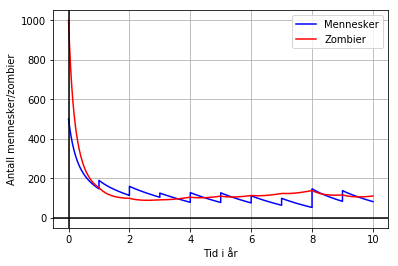

In [91]:
from random import randint

#Initialbetingelser
M0 = 500         #Mennesker i Alexandria ved start
Z0 = 1000        #Zombier i Alexandria ved start
t0 = 0           #Starttidspunkt

#Tidssteg
N       = 100000
t_slutt = 10     #Tid ved slutt i år
dt      = (t_slutt - t0)/N

#Konstanter
f       = 0.01   #Naturligfødselsrate
d_alder = 0.002  #Dødsrate grunnet alderdom
d_syk   = 0.03   #Dødsrate grunnet sykdom
d_skade = 0.01   #Dødsrate grunnet skader
inn_z   = 0.01   #Innvandring zombier
b       = 1000   #Bæreevne
e       = 0      #Konstant for å regne med innvandring hvert år

#Matriser
M    = zeros(N)
Mder = zeros(N)
Z    = zeros(N)
Zder = zeros(N)
t    = zeros(N)

#Initiering av matriser
M[0] = M0
Z[0] = Z0
t[0] = t0

# Drapskonstanter:
A = (f) - (d_alder + d_syk + d_skade)         #Naturlig vekstrate mennesker
B = 0.005                                     #Drapsmøterate (mennesker drept av zombier)
C = 0                                         #Omgjøringsrate (mennesker omgjort til zombier)                  
D = 0.009                                     #Drapsmøterate (zombier drept av mennesker)

#Eulers metode
for i in range (N-1):
    Mder[i] = M[i]*(A-B*Z[i])*(1-M[i]/b)
    Zder[i] = Z[i]*(C*M[i] - D*(M[i]))
    M[i+1]  = M[i] + Mder[i]*dt 
    if t[i] > 1 + e:
        M[i+1] = M[i+1] + randint(0,100)
        if M[i] > 20:
            e += 1
        elif 1 < M[i] < 20:
            e += 4
        else:
            e += 50
    Z[i+1]  = Z[i] + Zder[i]*dt + inn_z
    t[i+1]  = t[i] + dt
       
#Plotting    
plot(t,M, color = 'blue')
plot(t,Z, color = 'red')
legend(['Mennesker','Zombier'])
axhline(y=0, color = 'black')
axvline(x=0, color = 'black')
xlabel('Tid i år')
ylabel('Antall mennesker/zombier')
grid()

# Modell 5

#### Mennesker blir til zombier
Her endrer vi verdien C fra forrige modell til å være lik verdi B. Her tar vi høyde for at alle menneskene som blir drept av zombier, blir til zombier. Vi tror dette er sannsynlig ettersom zombien ikke vil rive mennesket i fillebiter før det allerede har transformert til zombietilstand, og dermed har blitt angriperens allierte.

#### Tolkning av grafen
Her ser vi plutselig at zombiene får en kraftig vekst. Vi ser også at menneskene er ille ute, ettersom fienden blir større og større etterhvert som menneskepopulasjonen minker. Vi ser også at antallet zombier flater ut når menneskene er nær utryddelse, ettersom det da ikke vil være fler mennesker å omgjøre til zombier. Zombiegrafen blir ikke helt jevn, ettersom det blir ujevn tilgang på mennesker med tilfeldig innvandring, som vi la til i modell 4.

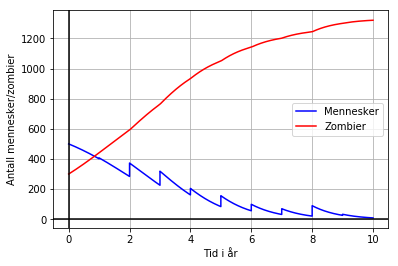

In [92]:
#Initialbetingelser
M0 = 500         #Mennesker i Alexandria ved start
Z0 = 300         #Zombier i Alexandria ved start
t0 = 0           #Starttidspunkt

#Konstanter
f       = 0.01   #Naturligfødselsrate
d_alder = 0.002  #Dødsrate grunnet alderdom
d_syk   = 0.03   #Dødsrate grunnet sykdom
d_skade = 0.01   #Dødsrate grunnet skader
b       = 1000   #Bæreevne
e       = 0      #Konstant for å regne med innvandring hvert år

#Tidssteg
N       = 1000000
t_slutt = 10     #Tid ved slutt i år
dt      = (t0 + t_slutt)/N

#Matriser
M    = zeros(N)
Mder = zeros(N)
Z    = zeros(N)
Zder = zeros(N)
t    = zeros(N)

# Konstanter:
A = (f) - (d_alder + d_syk + d_skade)         #Naturlig vekstrate mennesker
B = 0.001                                     #Drapsmøterate (mennesker drept av zombier)
C = B                                         #Omgjøringsrate (mennesker omgjort til zombier)                  
D = 0.00015                                   #Drapsmøterate (zombier drept av mennesker)

#Initiering av matriser
M[0] = M0
Z[0] = Z0
t[0] = t0

#Eulers metode
for i in range (N-1):
    Mder[i] = M[i]*(A-B*Z[i])*(1-M[i]/b)
    Zder[i] = Z[i]*(C*M[i]-D*(M[i]))
    M[i+1] = M[i] + Mder[i]*dt 
    if t[i] > 1 + e:
        M[i+1] = M[i+1] + randint(0,100)
        if M[i] > 20:
            e += 1
        elif 1 < M[i] < 20:
            e += 4
        else:
            e += 50
    Z[i+1] = Z[i] + Zder[i]*dt
    t[i+1] = t[i] + dt
    
    
#Plotting    
plot(t,M, color = 'blue')
plot(t,Z, color = 'red')
legend(['Mennesker','Zombier'])
axhline(y=0, color = 'black')
axvline(x=0, color = 'black')
xlabel('Tid i år')
ylabel('Antall mennesker/zombier')
grid()

# Modell 6

#### Forsterkninger fra Hilltop og Kingdom
Her har vi lagt til en menneskepopulasjon til. Vi har definert Hilltop og Kingdom som en. Vi gir størrelsen 2000 for den samlede utgangspopulasjonen og setter den samlede bæreevnen til 4000. Vi gir dem også en innvandringsrate tilsvarende slik vi gjorde for Alexandria i modell 1, men vi har økt den grunnet at flere mennesker vil tiltrekke flere mennesker. Videre er alt av matriser og Eulers metode gjort på helt tilsvarende metode som i Alexandria. Vi har videre definert at vi vil få en forsterkning fra disse byene dersom populasjonen i Alexandria er mellom 1 og 200 mennesker og populasjonen i Hilltop og Kingdom er over 300. Da vil det bli sendt en forsterkning på 50 mennesker. Disse legges dermed til i Alexandria sin populasjon, og fjernes fra populasjonen i Hilltop og Kingdom. Vi plotter også populasjonen i Hilltop og Kingdom mot tid, for å se hvordan deres forsterkninger påvirker begge menneskepopulasjonene ved å gi nedrykk i Hilltop og Kingdom sin graf, og opprykk i Alexandria.

#### Tolkning av grafen
Til forskjell fra forrige modell ser vi nå at vi får flere opprykk i populasjonen til Alexandria enn bare hvert år. Dette skyldes selvsagt forsterkningene fra Hilltop og Kingdom, og vi ser tilsvarende hvordan deres befolkning minker når de sender disse forsterkningene.

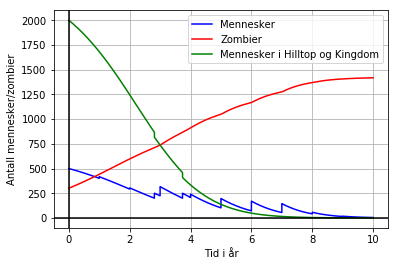

In [105]:
#Initialbetingelser
M0    = 500         #Mennesker i Alexandria ved start
M_hk0 = 2000        #Mennesker i Hilltop og Kingdom sammenlagt
Z0    = 300         #Zombier i Alexandria ved start
t0    = 0           #Starttidspunkt

#Konstanter
f       = 0.01      #Naturligfødselsrate
inn_hk  = 0.08      #Innvandringsrate for Hilltop og Kingdom
d_alder = 0.002     #Dødsrate grunnet alderdom
d_syk   = 0.03      #Dødsrate grunnet sykdom
d_skade = 0.01      #Dødsrate grunnet skader
b       = 1000      #Bæreevne
b_hk    = 4000      #Bæreevne for Hilltop og Kingdom sammenlagt
e       = 0         #Konstant for å regne med innvandring hvert år

#Tidssteg
N       = 1000000
t_slutt = 10        #Tid ved slutt i år
dt      = (t0 + t_slutt)/N

#Matriser
M        = zeros(N)
Mder     = zeros(N)
M_hk     = zeros(N)
M_hk_der = zeros(N)
Z        = zeros(N)
Zder     = zeros(N)
t        = zeros(N)

# Konstanter:
A = (f) - (d_alder + d_syk + d_skade)         #Naturlig vekstrate mennesker
B = 0.001                                     #Drapsmøterate (mennesker drept av zombier)
C = B                                         #Omgjøringsrate (mennesker omgjort til zombier)                  
D = 0.00015                                   #Drapsmøterate (zombier drept av mennesker)

#Initiering av matriser
M[0]    = M0
M_hk[0] = M_hk0
Z[0]    = Z0
t[0]    = t0

#Eulers metode
for i in range (N-1):
    Mder[i] = M[i]*(A-B*Z[i])*(1-M[i]/b)
    Zder[i] = Z[i]*(C*M[i]-D*(M[i]))
    M_hk_der[i] = M_hk[i]*(A+inn_hk-B*Z[i])*(1-M_hk[i]/b_hk)
    M[i+1] = M[i] + Mder[i]*dt 
    M_hk[i+1] = M_hk[i] + M_hk_der[i]*dt
    if t[i] > 1 + e:
        M[i+1] = M[i+1] + randint(0,100)
        if M[i] > 20:
            e += 1
        elif 1 < M[i] < 20:
            e += 4
        else:
            e += 50
    if 1 < M[i+1] < 200 and M_hk[i+1]>300:
        M[i+1] += 50
        M_hk[i+1] -= 50
    Z[i+1] = Z[i] + Zder[i]*dt
    t[i+1] = t[i] + dt
      
#Plotting    
plot(t,M, color = 'blue')
plot(t,Z, color = 'red')
plot(t,M_hk, color = 'green')
legend(['Mennesker','Zombier','Mennesker i Hilltop og Kingdom'])
axhline(y=0, color = 'black')
axvline(x=0, color = 'black')
xlabel('Tid i år')
ylabel('Antall mennesker/zombier')
grid()

# Husk å bruke setebelte:)  /(/)\